In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

ds    0
y     0
dtype: int64


04:35:02 - cmdstanpy - INFO - Chain [1] start processing
04:35:05 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


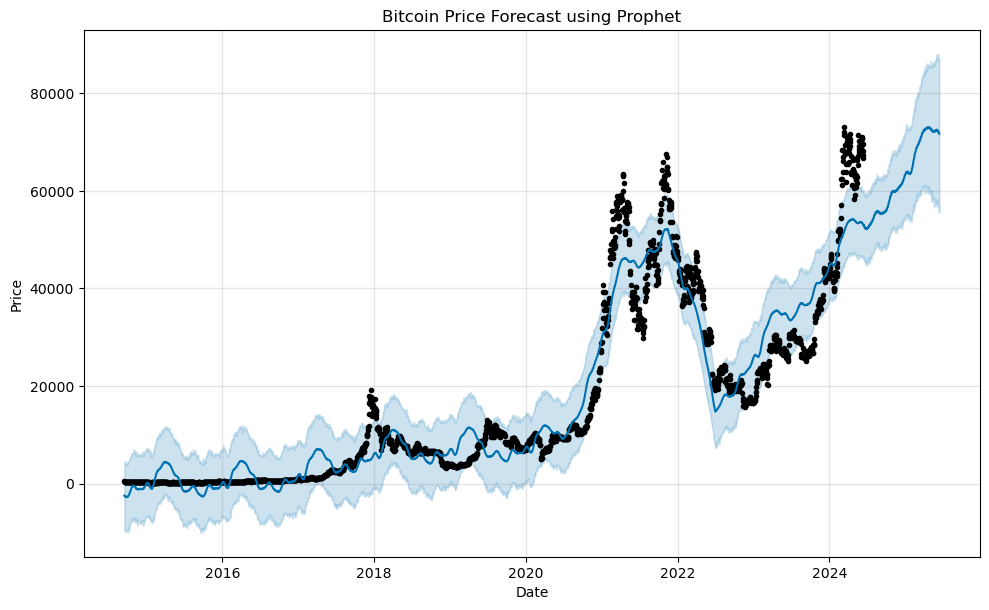

C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

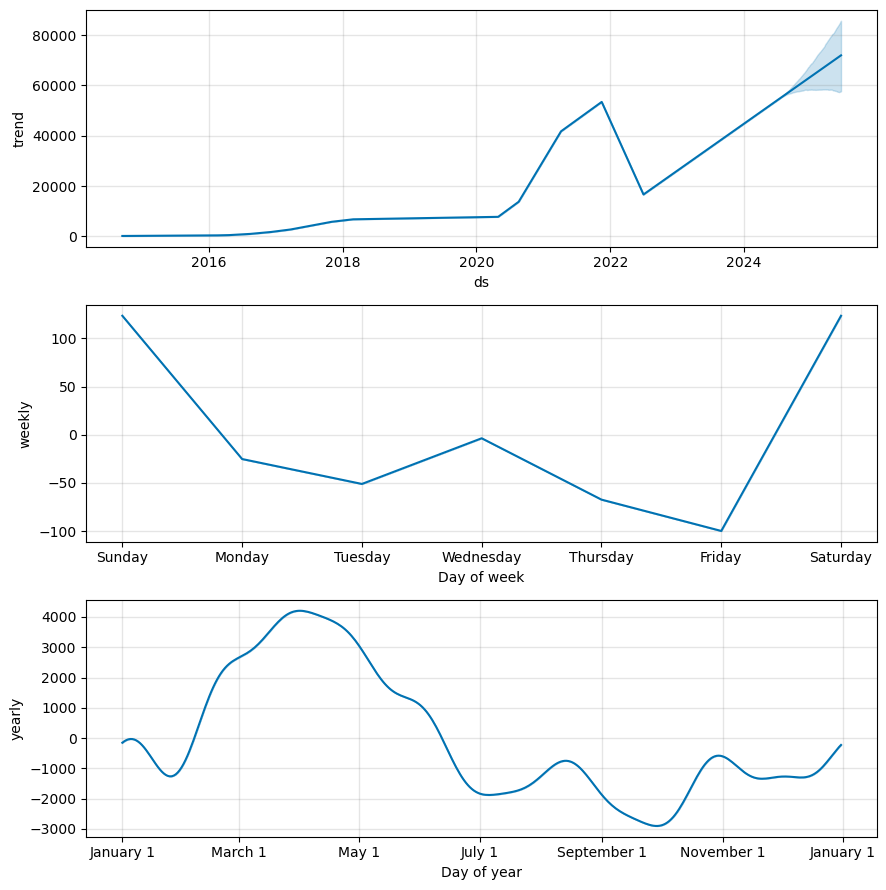

RMSE: 5404.747030601076
MAE: 3948.790359343796
R-squared: 0.9152998258453447


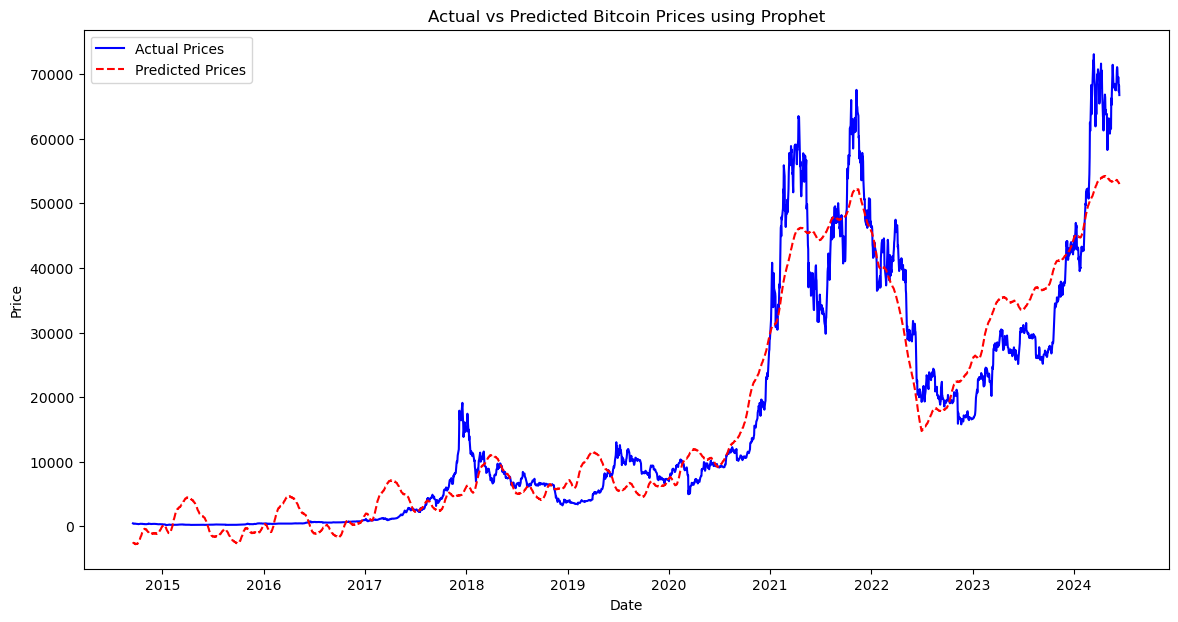

In [2]:

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a new DataFrame for Prophet
prophet_data = pd.DataFrame()
prophet_data['ds'] = data['Date']  # 'ds' is the date column for Prophet
prophet_data['y'] = data['Close']  # 'y' is the target column for Prophet

# Verify the data for any missing values
print(prophet_data.isna().sum())  

# Fit the Prophet Model
model = Prophet()
model.fit(prophet_data)

# Make Predictions
# Create a dataframe to hold the future predictions
future = model.make_future_dataframe(periods=365)  # Forecasting 365 days into the future
forecast = model.predict(future)

# Plot the Forecast
fig = model.plot(forecast)
plt.title('Bitcoin Price Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the forecast components (trend, weekly, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# Evaluate Model Performance

# Merge the actual and forecast data on the 'ds' column
evaluation_df = prophet_data.merge(forecast[['ds', 'yhat']], on='ds')

# Calculate the RMSE, MAE, and R-squared values
rmse = np.sqrt(mean_squared_error(evaluation_df['y'], evaluation_df['yhat']))
mae = mean_absolute_error(evaluation_df['y'], evaluation_df['yhat'])
r2 = r2_score(evaluation_df['y'], evaluation_df['yhat'])

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(14, 7))
plt.plot(evaluation_df['ds'], evaluation_df['y'], label='Actual Prices', color='blue')
plt.plot(evaluation_df['ds'], evaluation_df['yhat'], label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted Bitcoin Prices using Prophet')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()